In [126]:
%matplotlib inline
import os
import os.path as op
import mne
import numpy as np
import pandas as pd

In [127]:
# Load .edf file
filename = "C:\\Users\\sherl\\Downloads\\Vipin_Apple.edf"
raw = mne.io.read_raw_edf(filename)


Extracting EDF parameters from C:\Users\sherl\Downloads\Vipin_Apple.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


In [128]:
#raw.set_channel_types({'EOG':'eog'})   #If you have Electrooculography (EOG) channel,  set its name manually
#raw.set_channel_types({'ECG':'ecg'})   #If you have Electrocardiograms (ECG) channels, set its name manually

In [129]:
raw.resample(256, npad="auto")    # set sampling frequency to 256 points per second

<RawEDF | Vipin_Apple.edf, 39 x 3328 (13.0 s), ~1.0 MB, data loaded>

In [130]:
raw.filter(1, 45, fir_design='firwin', picks=['eeg'])  # band-pass filter from 1 to 30 frequency over just
                                                       # EEG channel and not EEG channel

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 845 samples (3.301 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  39 out of  39 | elapsed:    0.0s finished


<RawEDF | Vipin_Apple.edf, 39 x 3328 (13.0 s), ~1.0 MB, data loaded>

In [131]:
raw.set_eeg_reference('average', projection=True).apply_proj()  # re-referencing with the virtual average reference

EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Created an SSP operator (subspace dimension = 1)
1 projection items activated
SSP projectors applied...


<RawEDF | Vipin_Apple.edf, 39 x 3328 (13.0 s), ~1.0 MB, data loaded>

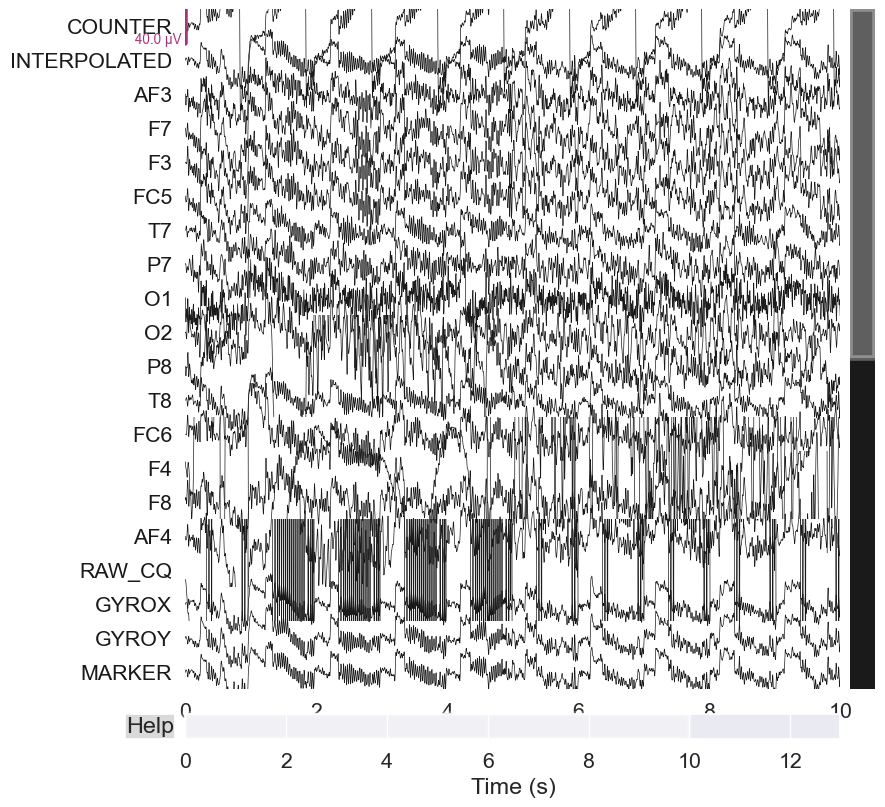

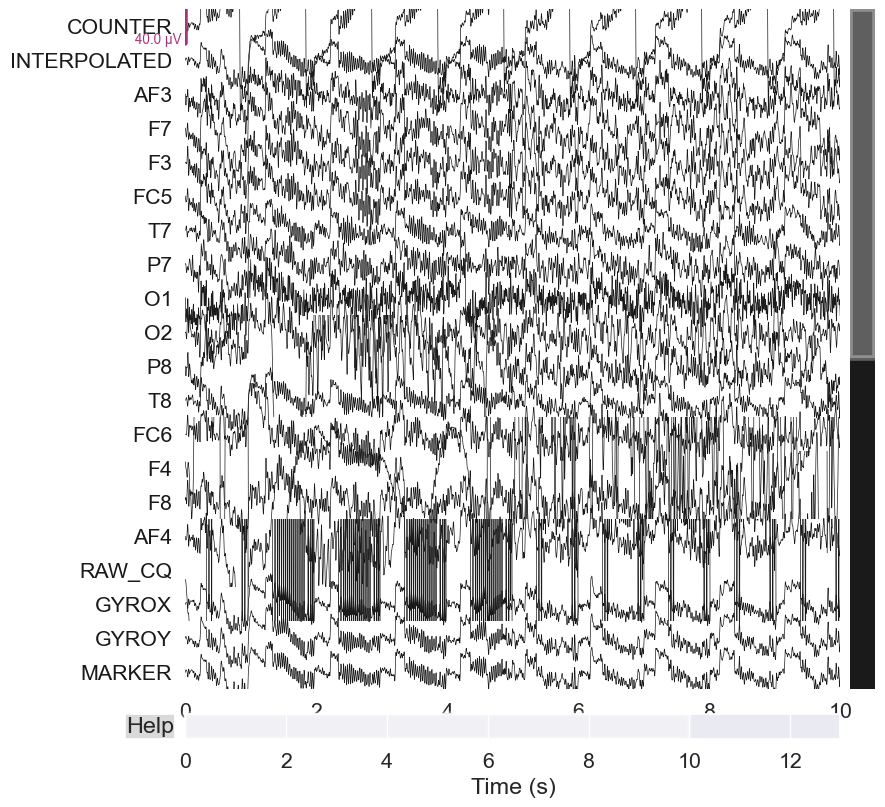

In [132]:
raw.plot()


In [133]:
print(raw.info)
'''
Sampling frequency (sfreq)
Channel names (ch_names)
Channel types (ch_types)
Channel units (units)
High-pass and low-pass filter settings (highpass, lowpass)
EEG reference (ref)
EEG electrode locations (chs[idx]['loc'])
Measurement date and time (meas_date)
Projector information (projs)
Bad channels (bads)
Sensor positions (dig)
Trigger information (n_savesys and related fields)
'''

<Info | 8 non-empty values
 bads: []
 ch_names: COUNTER, INTERPOLATED, AF3, F7, F3, FC5, T7, P7, O1, O2, P8, T8, ...
 chs: 39 EEG
 custom_ref_applied: False
 highpass: 1.0 Hz
 lowpass: 45.0 Hz
 meas_date: 2017-02-01 12:10:40 UTC
 nchan: 39
 projs: Average EEG reference: on
 sfreq: 256.0 Hz
>


"\nSampling frequency (sfreq)\nChannel names (ch_names)\nChannel types (ch_types)\nChannel units (units)\nHigh-pass and low-pass filter settings (highpass, lowpass)\nEEG reference (ref)\nEEG electrode locations (chs[idx]['loc'])\nMeasurement date and time (meas_date)\nProjector information (projs)\nBad channels (bads)\nSensor positions (dig)\nTrigger information (n_savesys and related fields)\n"

In [134]:
import mne


In [135]:
epochs = mne.read_epochs("C:\\Users\\sherl\\Downloads\\1Eldo-epo.fif")
# epochs1 = mne.read_epochs('../preprocessed/1Eldo-epo.fif')
# epochs2 = mne.read_epochs('../preprocessed/2Eldo-epo.fif')

Reading C:\Users\sherl\Downloads\1Eldo-epo.fif ...
    Found the data of interest:
        t =    -203.12 ...    2000.00 ms
        0 CTF compensation matrices available
Not setting metadata
444 matching events found
No baseline correction applied
0 projection items activated


In [136]:
# data1 = epochs1.get_data()
# data2 = epochs2.get_data()
# data = np.array(data1.tolist()+data2.tolist())
data=epochs.get_data()

In [137]:
ica = mne.preprocessing.ICA(n_components=14, random_state=97, method='fastica')
ica.fit(epochs)                                      # Data decomposition with 50 components and fastica method.

Fitting ICA to data using 14 channels (please be patient, this may take a while)


C:\Users\sherl\AppData\Local\Temp\ipykernel_28708\1906128710.py:2: RuntimeWarning: The epochs you passed to ICA.fit() were baseline-corrected. However, we suggest to fit ICA only on data that has been high-pass filtered, but NOT baseline-corrected.
  ica.fit(epochs)                                      # Data decomposition with 50 components and fastica method.


Selecting by number: 14 components


Fitting ICA took 2.9s.


C:\Users\sherl\AppData\Local\Temp\ipykernel_28708\1906128710.py:2: RuntimeWarning: Using n_components=14 (resulting in n_components_=14) may lead to an unstable mixing matrix estimation because the ratio between the largest (5.5) and smallest (4.3e-16) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 12
  ica.fit(epochs)                                      # Data decomposition with 50 components and fastica method.


Method,fastica
Fit,21 iterations on epochs (125652 samples)
ICA components,14
Available PCA components,14
Channel types,eeg
ICA components marked for exclusion,—


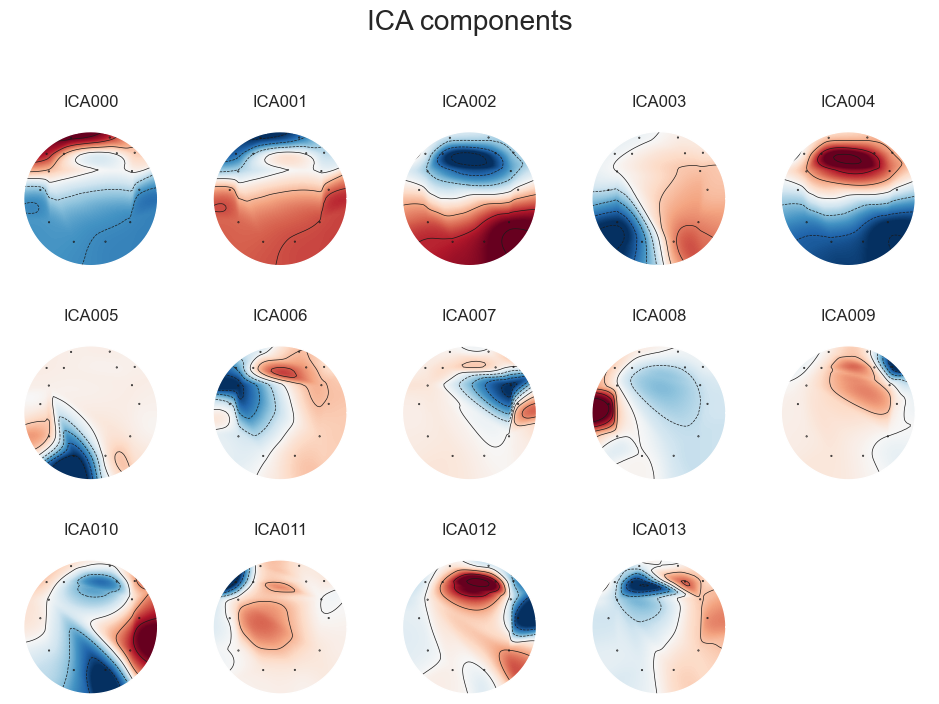

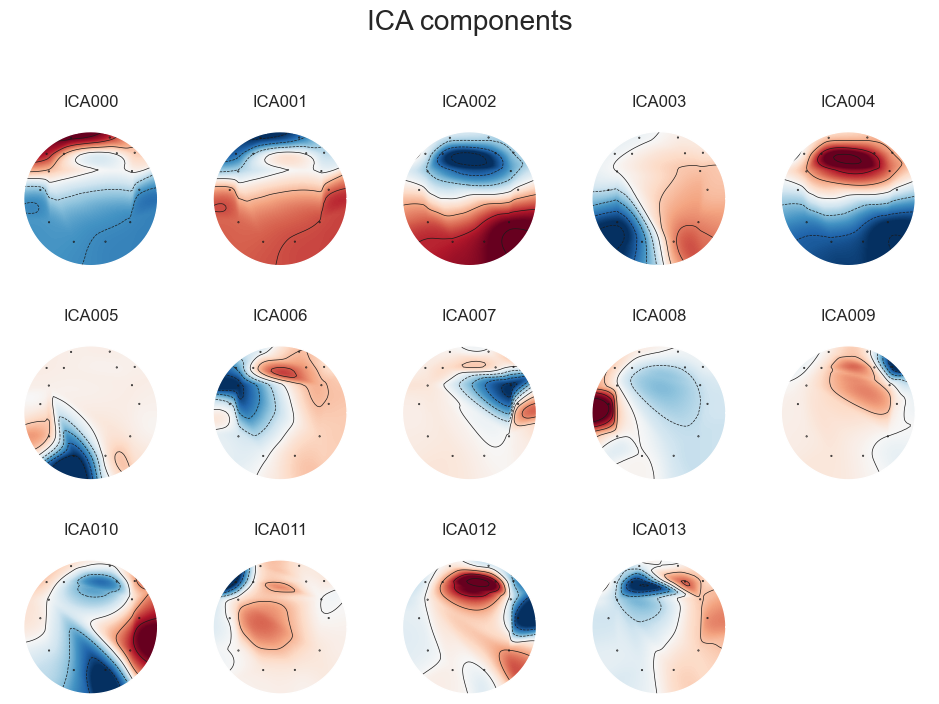

In [138]:
%matplotlib inline
# %matplotlib qt
ica.plot_components()  # Plot all decomposed components

In [139]:
ica.exclude = [11, 26, 29, 30, 33, 34, 35, 36, 38, 44, 48, 49, 0, 6, 17] 
                                        # Put all comonent which you want to remove containg inspected (manual) 
                                        # [11, 26, 29, 30, 33, 34, 35, 36, 38, 44, 48, 49], EOG [0] and ECG [6,17] components
                                        # Selected components are not real
ica.apply(epochs)                       # Channels can be reconstructed using the ICA object’s apply()

Applying ICA to Epochs instance
    Transforming to ICA space (14 components)
    Zeroing out 3 ICA components
    Projecting back using 14 PCA components


C:\Users\sherl\AppData\Local\Temp\ipykernel_28708\2848464973.py:5: RuntimeWarning: The data you passed to ICA.apply() was baseline-corrected. Please note that ICA can introduce DC shifts, therefore you may wish to consider baseline-correcting the cleaned data again.
  ica.apply(epochs)                       # Channels can be reconstructed using the ICA object’s apply()


Number of events,444
Events,label_IS1-COLD: 15label_IS1-DOCTOR: 15label_IS1-EATING: 15label_IS1-LIGHT: 15label_IS1-PAIN: 15label_IS1-SICK: 15label_IS1-TOILET: 15label_IS1-TV: 15label_IS1-WATER: 13label_IS1-YES: 14label_IS2-COLD: 14label_IS2-DOCTOR: 15label_IS2-EATING: 15label_IS2-LIGHT: 15label_IS2-PAIN: 15label_IS2-SICK: 15label_IS2-TOILET: 14label_IS2-TV: 15label_IS2-WATER: 15label_IS2-YES: 15label_IS3-COLD: 14label_IS3-DOCTOR: 15label_IS3-EATING: 15label_IS3-LIGHT: 15label_IS3-PAIN: 15label_IS3-SICK: 15label_IS3-TOILET: 15label_IS3-TV: 15label_IS3-WATER: 15label_IS3-YES: 15
Time range,-0.203 – 2.000 s
Baseline,-0.203 – 0.000 s


In [140]:
epochs.save("C:\\Users\\sherl\\Downloads\\sub-006_prerprocessed.fif",overwrite=True)


Overwriting existing file.


C:\Users\sherl\AppData\Local\Temp\ipykernel_28708\3336386786.py:1: RuntimeWarning: This filename (C:\Users\sherl\Downloads\sub-006_prerprocessed.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs.save("C:\\Users\\sherl\\Downloads\\sub-006_prerprocessed.fif",overwrite=True)


In [141]:
import matplotlib
import os
import os.path as op
import mne
import numpy as np
import pandas as pd
# from mne_icalabel import label_components
# from mayavi import mlab
# %gui qt
# %matplotlib qt
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GroupKFold,GridSearchCV,cross_val_score,cross_validate 
# Load necessary libraries
import mne
from mne.decoding import Vectorizer

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support

# Models
from sklearn import svm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [142]:
data.shape

(444, 14, 283)

In [143]:
imagined_words_dict ={ "SICK":1,
"COLD":2,
"PAIN":3,
"TOILET":4,
"EATING":5,
"WATER":6,
"LIGHT":7,
"DOCTOR":8,
"YES":9,
"TV":10
}

In [144]:
epochs.events


array([[ 40735,      0,     29],
       [ 43678,      0,     48],
       [ 44062,      0,     58],
       ...,
       [470945,      0,     32],
       [471329,      0,     42],
       [471715,      0,     52]])

In [145]:
def set_label(epochss):
    labels = epochss.events[:, -1].copy()
    event_id = epochss.event_id
    for i in range(len(labels)):
        label_key =list(event_id.keys())[list(event_id.values()).index(labels[i])]
        start_index =label_key.find("-")
        label_key=label_key[start_index+1:]
        labels[i] =imagined_words_dict[label_key]
    return labels


In [146]:
# labels1 = set_label(epochs1)
# labels2 = set_label(epochs2)
# labels = np.array(labels1.tolist() + labels2.tolist())
labels = set_label(epochs)

In [147]:
labels

array([ 2,  9,  9,  6,  6,  4,  4,  4,  3,  3,  3,  7,  7,  7,  8,  8,  8,
        1,  1,  1,  5,  5,  5, 10, 10, 10,  9,  9,  9,  6,  6,  6,  7,  7,
        7,  4,  4,  4,  8,  8,  8, 10, 10, 10,  1,  1,  1,  5,  5,  5,  3,
        3,  3,  2,  2,  2,  2,  2,  2,  6,  6,  6, 10, 10, 10,  1,  1,  1,
        3,  3,  3,  5,  5,  5,  9,  9,  9,  7,  7,  7,  4,  4,  4,  8,  8,
        8,  4,  4,  4,  5,  5,  5,  8,  8,  8,  9,  9,  9,  2,  2,  2, 10,
       10, 10,  7,  7,  7,  6,  6,  6,  3,  3,  3,  1,  1,  1,  6,  6,  6,
        2,  2,  2,  4,  4,  4,  5,  5,  5,  7,  7,  7,  8,  8,  8,  9,  9,
        9,  1,  1,  1,  3,  3,  3, 10, 10, 10,  5,  5,  5,  7,  7,  7, 10,
       10, 10,  9,  9,  9,  4,  4,  4,  6,  6,  6,  8,  8,  8,  2,  2,  2,
        3,  3,  3,  1,  1,  1, 10, 10, 10,  4,  4,  4,  2,  2,  2,  5,  5,
        5,  1,  1,  1,  8,  8,  8,  6,  6,  6,  7,  7,  7,  9,  9,  9,  3,
        3,  3,  2,  2,  2,  4,  4,  4,  3,  3,  3,  5,  5,  5,  1,  1,  1,
       10, 10, 10,  8,  8

In [148]:
data.shape , labels.shape

((444, 14, 283), (444,))

In [149]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
def read_split_epoch(split):
    epochs = mne.read_epochs("C:\\Users\\sherl\\Downloads\\1Eldo-epo.fif")
    data = epochs.get_data()
    labels = set_label(epochs)
    # Split the data into training and testing sets
    train_epoch, test_epoch, tr_labels, ts_labels = train_test_split(data, labels, test_size = 0.25, random_state = 42)
    return train_epoch, test_epoch, tr_labels, ts_labels

In [150]:
tr_ep_data,ts_ep_data,tr_labels,ts_labels = read_split_epoch(25)

Reading C:\Users\sherl\Downloads\1Eldo-epo.fif ...
    Found the data of interest:
        t =    -203.12 ...    2000.00 ms
        0 CTF compensation matrices available
Not setting metadata
444 matching events found
No baseline correction applied
0 projection items activated


In [151]:
def make_windowing(X,Y):
    X_new = []
    Y_new = []
    npt = 128 # .5 sec
    stride = 8 # around .1 sec
    ctr = 0
    for i in range(0,X.shape[0]):
        y = Y[i]
        a= X[i,:,:]
        a = a.transpose()
        a.shape
        val = 0
        kd=len(a)
        while val<=(len(a)-npt):
            x = a[val:val+npt,:]

            X_new.append(x.T)
            Y_new.append(y)
            val = val+stride
            
    return np.array(X_new),np.array(Y_new)

In [152]:
tr_window_data,tr_window_labels = make_windowing(tr_ep_data,tr_labels)
ts_window_data,ts_window_labels = make_windowing(ts_ep_data,ts_labels)
#window_data,window_labels =data,labels



In [153]:
tr_window_data.shape, tr_window_labels.shape


((6660, 14, 128), (6660,))

In [154]:
ts_window_data.shape, ts_window_labels.shape

((2220, 14, 128), (2220,))

In [155]:
np.mean(tr_window_data,axis=-1).shape

(6660, 14)

In [156]:
np.mean(ts_window_data,axis=-1).shape

(2220, 14)

In [157]:
tr_ep_data,ts_ep_data,tr_labels,ts_labels = read_split_epoch(25)

Reading C:\Users\sherl\Downloads\1Eldo-epo.fif ...
    Found the data of interest:
        t =    -203.12 ...    2000.00 ms
        0 CTF compensation matrices available
Not setting metadata
444 matching events found
No baseline correction applied
0 projection items activated


In [158]:
tr_labels.shape

(333,)

In [159]:
ts_labels.shape

(111,)

In [160]:
from scipy import stats
def mean(data):
    return np.mean(data,axis=-1)
    
def std(data):
    return np.std(data,axis=-1)

def ptp(data):
    return np.ptp(data,axis=-1)

def var(data):
        return np.var(data,axis=-1)

def minim(data):
      return np.min(data,axis=-1)


def maxim(data):
      return np.max(data,axis=-1)

def argminim(data):
      return np.argmin(data,axis=-1)


def argmaxim(data):
      return np.argmax(data,axis=-1)

def mean_square(data):
      return np.mean(data**2,axis=-1)

def rms(data): #root mean square
      return  np.sqrt(np.mean(data**2,axis=-1))  

def abs_diffs_signal(data):
    return np.sum(np.abs(np.diff(data,axis=-1)),axis=-1)


def skewness(data):
    return stats.skew(data,axis=-1)

def kurtosis(data):
    return stats.kurtosis(data,axis=-1)

def concatenate_features(data):
    return np.concatenate((mean(data),std(data),ptp(data),var(data),minim(data),maxim(data),argminim(data),argmaxim(data),
                          mean_square(data),rms(data),abs_diffs_signal(data),
                          skewness(data),kurtosis(data)),axis=-1)



In [ ]:
# import numpy as np
# from scipy import signal

# def extract_frequency_features(signal, sampling_rate):
#     # Calculate the power spectrum using Welch's method
#     f, psd = signal.welch(signal, fs=sampling_rate)
    
#     # Define the frequency bands of interest
#     alpha_band = (8, 13)
#     beta_band = (13, 30)
#     theta_band = (4, 8)
    
#     # Calculate the power within each frequency band
#     alpha_power = np.sum(psd[(f >= alpha_band[0]) & (f <= alpha_band[1])])
#     beta_power = np.sum(psd[(f >= beta_band[0]) & (f <= beta_band[1])])
#     theta_power = np.sum(psd[(f >= theta_band[0]) & (f <= theta_band[1])])
    
#     # Calculate the spectral centroid
#     spectral_centroid = np.average(f, weights=psd)
    
#     # Calculate the spectral flatness
#     spectral_flatness = np.exp(np.mean(np.log(psd)))
    
#     # Calculate the spectral entropy
#     spectral_entropy = -np.sum(psd * np.log2(psd))
    
#     # Find the index of the peak frequency
#     peak_frequency_index = np.argmax(psd)
    
#     # Get the peak frequency and peak power
#     peak_frequency = f[peak_frequency_index]
#     peak_power = psd[peak_frequency_index]
    
#     # Return the extracted features
#     return alpha_power, beta_power, theta_power, spectral_centroid, spectral_flatness, spectral_entropy, peak_frequency, peak_power

# # Assuming you have your imagined speech EEG data in 'X' and corresponding sampling rate in 'sampling_rate'
# frequency_features = []

# for signal in X:
#     features = extract_frequency_features(signal, sampling_rate)
#     frequency_features.append(features)

# frequency_features = np.array(frequency_features)

# # Assuming you have extracted the frequency features and stored them in the 'frequency_features' array

# # Concatenate the features into a single vector
# concatenated_features = np.concatenate(frequency_features, axis=1)

# # Print the shape of the concatenated features
# print("Shape of concatenated features:", concatenated_features.shape)


In [161]:
tr_window_data[0].shape


(14, 128)

In [162]:
ts_window_data[0].shape

(14, 128)

In [163]:
from tqdm import tqdm
tr_features=[]
for datta in tqdm(tr_window_data):
    tr_features.append(concatenate_features(datta))
tr_features=np.array(tr_features)
tr_features.shape



  5%|▌         | 336/6660 [00:01<00:26, 240.45it/s]

100%|██████████| 6660/6660 [00:23<00:00, 281.70it/s]


(6660, 182)

In [164]:
ts_window_data.shape


(2220, 14, 128)

In [165]:
# from tqdm import tqdm
# ts_features=[]
# for datta in tqdm(ts_window_data):
#     ts_features.append(concatenate_features(datta))
# ts_features=np.array(features)
# ts_features.shape

from tqdm import tqdm

ts_features = []
for datta in tqdm(ts_window_data):
    features = concatenate_features(datta)
    ts_features.append(features)

ts_features = np.array(ts_features)
ts_features.shape


  1%|          | 25/2220 [00:00<00:08, 246.57it/s]

100%|██████████| 2220/2220 [00:07<00:00, 289.06it/s]


(2220, 182)

In [166]:
# from sklearn.svm import SVC
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score
# # Assuming you have your feature matrix X and target labels y

# # Split the data into training and testing sets
# train_features, test_features, train_labels, test_labels = train_test_split(features, window_labels, test_size=0.25, random_state=52)


In [167]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [168]:
print('Training Features Shape:', tr_features.shape)
print('Training Labels Shape:', tr_labels.shape)
print('Testing Features Shape:', ts_features.shape)
print('Testing Labels Shape:', ts_labels.shape)

Training Features Shape: (6660, 182)
Training Labels Shape: (333,)
Testing Features Shape: (2220, 182)
Testing Labels Shape: (111,)


In [169]:
import matplotlib
import os
import os.path as op
import mne
import numpy as np
import pandas as pd
# from mne_icalabel import label_components
# from mayavi import mlab
# %gui qt
# %matplotlib qt
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GroupKFold,GridSearchCV,cross_val_score,cross_validate 
# Load necessary libraries
import mne
from mne.decoding import Vectorizer

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support

# Models
from sklearn import svm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [173]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



In [174]:
tr_features.shape

(6660, 182)

In [175]:
tr_labels.shape

(333,)

In [177]:
# # Create a Gaussian Naive Bayes classifier
# clf = GaussianNB()

In [178]:
# Train the classifier on the training data
clf.fit(tr_features, tr_window_labels)

SVC()

In [179]:
ts_window_labels.shape

(2220,)

In [180]:
# Make predictions on the test data
y_pred = clf.predict(ts_features)



In [181]:
ts_labels.shape

(111,)

In [182]:
#y_pred.shape

In [183]:
# Calculate the accuracy of the classifier
accuracy = accuracy_score(ts_window_labels, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.08468468468468468
